### Learning objectives

1. Perform a power analysis
1. Test many hypotheses 
1. Adjust for multiple tests using FWER correction
1. Adjust for multiple tests using FDR correction

### Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats import multitest

### Power Analysis

In [6]:
# explore the binomial test function
# binomial test

stats.binom_test([10, 60])

8.004823399455642e-10

In [7]:
# explore the binomial test function
# binomial test
# input as successes and trials
stats.binom_test(x = 10, n = 70)

8.004823399455642e-10

In [8]:
# simulate some binomial draws
for i in range(0, 10):
    print(np.random.binomial(n = 10, p = 0.5))

5
4
6
5
4
6
6
2
7
6


In [9]:
# simulate some binomial draws
for i in range(0, 10):
    print(np.random.binomial(n = 10, p = 0.8))

7
7
8
9
7
7
5
8
8
7


In [10]:
# then test youri simulations
n_trials = 1000
true_p = 0.51
n_reads = 10

sim_suc= np.random.binomial(n = n_reads, p = true_p)
stats.binom_test(x=sim_suc, n= n_reads)


0.7539062500000002

In [30]:
# then test youri simulations
n_trials = 1000
true_p = 0.51
n_reads = 100
#initialize list
sim_p = [None] * 1000

trial = 0
while trial < n_trials:
    sim_suc= np.random.binomial(n = n_reads, p = true_p)
    sim_p[trial]= stats.binom_test(x=sim_suc, n= n_reads)
    trial+=1
    
sim_p    

[0.2712530240738342,
 0.6172994135892526,
 0.4841184136072908,
 0.4841184136072908,
 0.020978735677851718,
 0.36820161732669654,
 0.13321061920721353,
 0.19334790449564238,
 0.7643534344026666,
 0.4841184136072908,
 0.13321061920721353,
 0.7643534344026666,
 0.05688793364098078,
 0.6172994135892526,
 0.4841184136072908,
 0.9204107626128206,
 0.13321061920721353,
 0.6172994135892526,
 0.6172994135892526,
 0.6172994135892526,
 0.13321061920721353,
 0.006637120515926125,
 0.4841184136072908,
 0.36820161732669654,
 0.4841184136072908,
 0.9204107626128206,
 0.7643534344026666,
 0.6172994135892526,
 0.9204107626128206,
 1.0,
 0.36820161732669654,
 0.19334790449564238,
 0.9204107626128206,
 0.6172994135892526,
 0.36820161732669654,
 0.2712530240738342,
 0.6172994135892526,
 0.2712530240738342,
 0.19334790449564238,
 0.9204107626128206,
 0.9204107626128206,
 0.19334790449564238,
 0.7643534344026666,
 0.03520020021770481,
 0.13321061920721353,
 0.7643534344026666,
 0.4841184136072908,
 0.484118

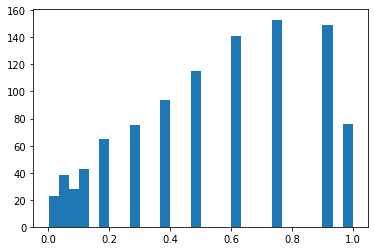

In [31]:
# plot a histogram of p-values

fig, ax = plt.subplots()
ax.hist(sim_p, bins = 30)
plt.show()

In [40]:
# now compute Power

# then test youri simulations
n_trials = 10000
true_p = 0.51
n_reads = 10000
#initialize list
sim_p = [None] * n_trials
alpha = 0.05
trial = 0
n_sig = 0
while trial < n_trials:
    sim_suc= np.random.binomial(n = n_reads, p = true_p)
    sim_p[trial]= stats.binom_test(x=sim_suc, n= n_reads)
    if (sim_p[trial]< alpha):
        n_sig +=1
    trial +=1
#power:probabitily of rejecting the null hypothesis
#when the null hypothesis is false
power = n_sig / n_trials
power

0.5073

In [9]:
# change the number of reads and re-compute



In [10]:
# change the simulated probability (i.e. the true ASE)



In [41]:
# wrap it all in a function

n_trials = 10000
true_p = 0.51
n_reads = 10000
#initialize list
sim_p = [None] * n_trials
alpha = 0.05

def binom_power(n_reads, true_p, n_trials = 10000, alpha = 0.5):

    trial = 0
    n_sig = 0
    while trial < n_trials:
        sim_suc= np.random.binomial(n = n_reads, p = true_p)
        sim_p[trial]= stats.binom_test(x=sim_suc, n= n_reads)
        if (sim_p[trial]< alpha):
            n_sig +=1
        trial +=1
    power = n_sig / n_trials
    return(power)


In [42]:
# test your function

binom_power(n_reads = 30, true_p = 0.55, n_trials = 10000, alpha = 0.5)

0.4283

In [44]:
# apply your function over a range of input values
p_range = [0.51, 0.55]
reads_range = [1,2,5,10,20,50,100,200,500,1000]

power_df = pd.DataFrame({"true_p" : [],
                        "n_reads" : [],
                        "power" : []})
for i in p_range:
    for j in reads_range:
        sim_power = binom_power(n_reads = j, true_p = i, n_trials = 1000, alpha = 0.5)
        new_row = pd.DataFrame({"true_p" : [i],
                        "n_reads" : [j],
                        "power" : [sim_power]})
        power_df = power_df.append(new_row)
power_df

,true_p,n_reads,power
0,0.51,1.0,0.000
0,0.51,2.0,0.000
0,0.51,5.0,0.359
0,0.51,10.0,0.376
0,0.51,20.0,0.264
0,0.51,50.0,0.499
0,0.51,100.0,0.493
0,0.51,200.0,0.440
0,0.51,500.0,0.492
0,0.51,1000.0,0.531


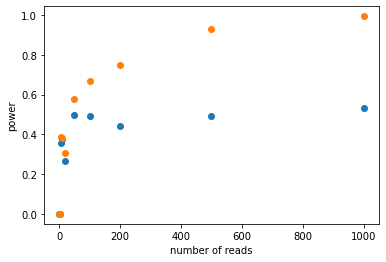

In [47]:
# plot your output

power_df[power_df['true_p'] == 0.51]
fig, ax = plt.subplots()
ax.scatter(power_df[power_df['true_p'] == 0.51]['n_reads'], power_df[power_df['true_p'] == 0.51]['power'], label = 'p=0.51')
ax.scatter(power_df[power_df['true_p'] == 0.55]['n_reads'], power_df[power_df['true_p'] == 0.55]['power'], label = 'p=0.55')
plt.ylabel('power')
plt.xlabel('number of reads')
plt.show()



In [15]:
# put it all in one plot



### Load the allele-specific expression data

McCoy, R. C., Wakefield, J., & Akey, J. M. (2017). Impacts of Neanderthal-introgressed sequences on the landscape of human gene expression. Cell, 168(5), 916-927.

In [48]:
# obtain data from "https://www.dropbox.com/s/rvwz50pons1l8qm/ase_table.txt?dl=1" 
df = pd.read_csv("https://www.dropbox.com/s/rvwz50pons1l8qm/ase_table.txt?dl=1", sep='\t')
df



,CHR,POS,REF_ALLELE,ALT_ALLELE,REF_COUNT,ALT_COUNT,TOTAL_COUNT,VARIANT_ANNOTATION,GENE_ID
0,14,104384405,C,T,5,9,14,5_prime_UTR_variant,ENSG00000156411
1,10,121338507,C,T,8,6,14,intron_variant,ENSG00000151923
2,10,114200355,G,A,10,8,18,synonymous_variant,ENSG00000023041
3,13,95673122,T,C,10,6,16,3_prime_UTR_variant,ENSG00000125257
4,10,115381747,G,A,1195,899,2094,missense_variant,ENSG00000197893
...,...,...,...,...,...,...,...,...,...
99995,10,127478594,G,C,4,6,10,intron_variant,ENSG00000188690
99996,10,14567412,A,G,13,10,23,intron_variant,ENSG00000065809
99997,10,135037575,G,A,8,3,11,intron_variant,ENSG00000171798
99998,10,12228298,C,T,15,15,30,5_prime_UTR_variant,ENSG00000165609


### Apply the binomial test

In [49]:
# loop over rows of df and perform binomial test
df['binom_p_val'] = float()

for row_idx in df.index:
    row = df.loc[row_idx]
    p_val = stats.binom_test([row["REF_COUNT"], row["ALT_COUNT"]])
    df.loc[row_idx, "binom_p_val"] = p_val
df

,CHR,POS,REF_ALLELE,ALT_ALLELE,REF_COUNT,ALT_COUNT,TOTAL_COUNT,VARIANT_ANNOTATION,GENE_ID,binom_p_val
0,14,104384405,C,T,5,9,14,5_prime_UTR_variant,ENSG00000156411,4.239502e-01
1,10,121338507,C,T,8,6,14,intron_variant,ENSG00000151923,7.905273e-01
2,10,114200355,G,A,10,8,18,synonymous_variant,ENSG00000023041,8.145294e-01
3,13,95673122,T,C,10,6,16,3_prime_UTR_variant,ENSG00000125257,4.544983e-01
4,10,115381747,G,A,1195,899,2094,missense_variant,ENSG00000197893,1.067110e-10
...,...,...,...,...,...,...,...,...,...,...
99995,10,127478594,G,C,4,6,10,intron_variant,ENSG00000188690,7.539063e-01
99996,10,14567412,A,G,13,10,23,intron_variant,ENSG00000065809,6.776395e-01
99997,10,135037575,G,A,8,3,11,intron_variant,ENSG00000171798,2.265625e-01
99998,10,12228298,C,T,15,15,30,5_prime_UTR_variant,ENSG00000165609,1.000000e+00


### Apply multiple testing corrections

In [51]:
# alpha = 0.05 / number of statistical tests
0.05/100000

5e-07

In [56]:
# count significant SNPs based on Bonferroni correction
df["sig_bf_0.05"] = df["binom_p_val"] < (alpha/100000)
df

,CHR,POS,REF_ALLELE,ALT_ALLELE,REF_COUNT,ALT_COUNT,TOTAL_COUNT,VARIANT_ANNOTATION,GENE_ID,binom_p_val,sig_bf_0.05
0,14,104384405,C,T,5,9,14,5_prime_UTR_variant,ENSG00000156411,4.239502e-01,False
1,10,121338507,C,T,8,6,14,intron_variant,ENSG00000151923,7.905273e-01,False
2,10,114200355,G,A,10,8,18,synonymous_variant,ENSG00000023041,8.145294e-01,False
3,13,95673122,T,C,10,6,16,3_prime_UTR_variant,ENSG00000125257,4.544983e-01,False
4,10,115381747,G,A,1195,899,2094,missense_variant,ENSG00000197893,1.067110e-10,True
...,...,...,...,...,...,...,...,...,...,...,...
99995,10,127478594,G,C,4,6,10,intron_variant,ENSG00000188690,7.539063e-01,False
99996,10,14567412,A,G,13,10,23,intron_variant,ENSG00000065809,6.776395e-01,False
99997,10,135037575,G,A,8,3,11,intron_variant,ENSG00000171798,2.265625e-01,False
99998,10,12228298,C,T,15,15,30,5_prime_UTR_variant,ENSG00000165609,1.000000e+00,False


In [57]:
df['sig_bf_0.05'].value_counts()

False    99677
True       323
Name: sig_bf_0.05, dtype: int64

In [60]:
# try the built-in multitests function
#from statsmodels.stats import multitest
df['sig_bs_0.05_v2'] = multitest.multipletests(df['binom_p_val'], 
                          method = 'bonferroni',
                          alpha = 0.05)[0]
df

,CHR,POS,REF_ALLELE,ALT_ALLELE,REF_COUNT,ALT_COUNT,TOTAL_COUNT,VARIANT_ANNOTATION,GENE_ID,binom_p_val,sig_bf_0.05,sig_bs_0.05_v2
0,14,104384405,C,T,5,9,14,5_prime_UTR_variant,ENSG00000156411,4.239502e-01,False,False
1,10,121338507,C,T,8,6,14,intron_variant,ENSG00000151923,7.905273e-01,False,False
2,10,114200355,G,A,10,8,18,synonymous_variant,ENSG00000023041,8.145294e-01,False,False
3,13,95673122,T,C,10,6,16,3_prime_UTR_variant,ENSG00000125257,4.544983e-01,False,False
4,10,115381747,G,A,1195,899,2094,missense_variant,ENSG00000197893,1.067110e-10,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,127478594,G,C,4,6,10,intron_variant,ENSG00000188690,7.539063e-01,False,False
99996,10,14567412,A,G,13,10,23,intron_variant,ENSG00000065809,6.776395e-01,False,False
99997,10,135037575,G,A,8,3,11,intron_variant,ENSG00000171798,2.265625e-01,False,False
99998,10,12228298,C,T,15,15,30,5_prime_UTR_variant,ENSG00000165609,1.000000e+00,False,False


In [62]:
# tabulate the significant results
df["sig_bs_0.05_v2"].value_counts()

False    99677
True       323
Name: sig_bs_0.05_v2, dtype: int64

In [63]:
# now try FDR correction
df["sig_fdr_bh_0.05"] = multitest.multipletests(df["binom_p_val"], 
                                                method = "fdr_bh", 
                                                alpha = 0.05)[0]
df

,CHR,POS,REF_ALLELE,ALT_ALLELE,REF_COUNT,ALT_COUNT,TOTAL_COUNT,VARIANT_ANNOTATION,GENE_ID,binom_p_val,sig_bf_0.05,sig_bs_0.05_v2,sig_fdr_bh_0.05
0,14,104384405,C,T,5,9,14,5_prime_UTR_variant,ENSG00000156411,4.239502e-01,False,False,False
1,10,121338507,C,T,8,6,14,intron_variant,ENSG00000151923,7.905273e-01,False,False,False
2,10,114200355,G,A,10,8,18,synonymous_variant,ENSG00000023041,8.145294e-01,False,False,False
3,13,95673122,T,C,10,6,16,3_prime_UTR_variant,ENSG00000125257,4.544983e-01,False,False,False
4,10,115381747,G,A,1195,899,2094,missense_variant,ENSG00000197893,1.067110e-10,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,127478594,G,C,4,6,10,intron_variant,ENSG00000188690,7.539063e-01,False,False,False
99996,10,14567412,A,G,13,10,23,intron_variant,ENSG00000065809,6.776395e-01,False,False,False
99997,10,135037575,G,A,8,3,11,intron_variant,ENSG00000171798,2.265625e-01,False,False,False
99998,10,12228298,C,T,15,15,30,5_prime_UTR_variant,ENSG00000165609,1.000000e+00,False,False,False


In [64]:
# tabulate significant results
df["sig_fdr_bh_0.05"].value_counts()

False    98846
True      1154
Name: sig_fdr_bh_0.05, dtype: int64